In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import classification_report

# Data

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("./data/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [3]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [4]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


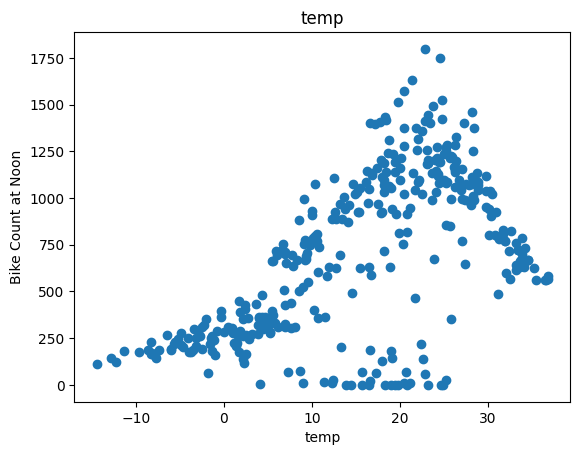

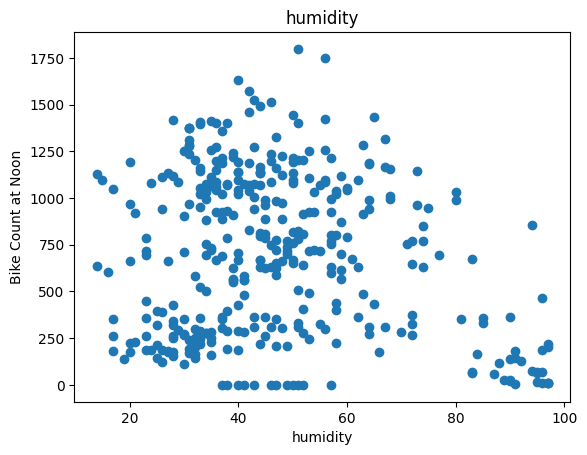

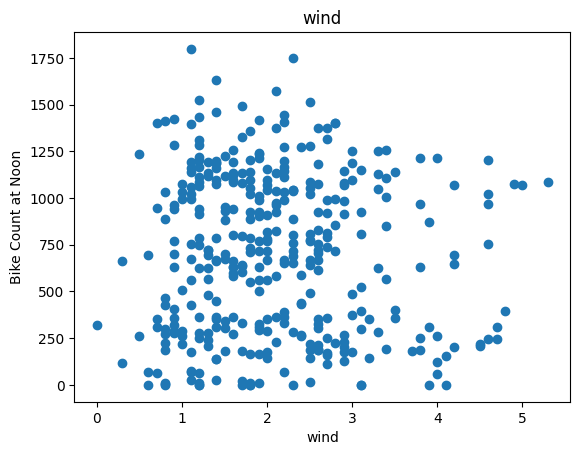

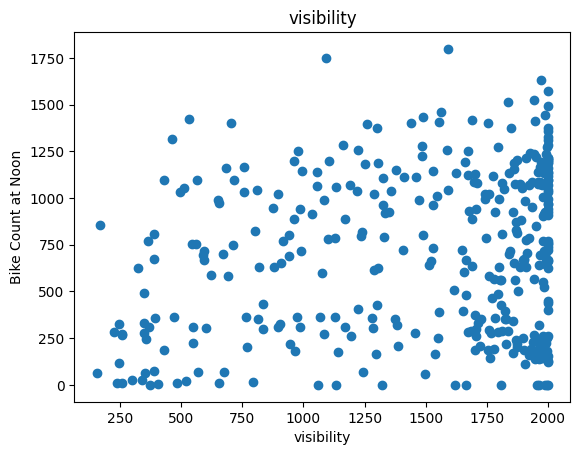

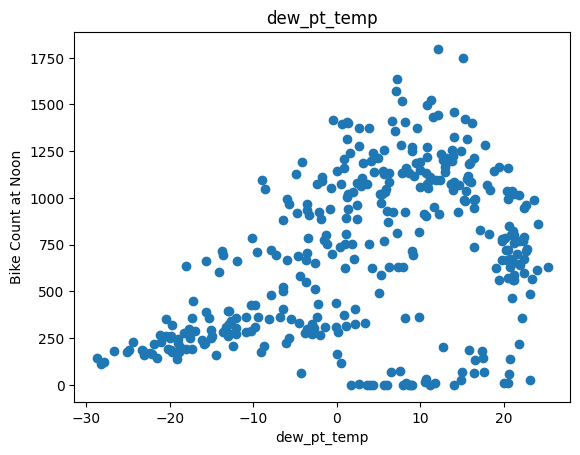

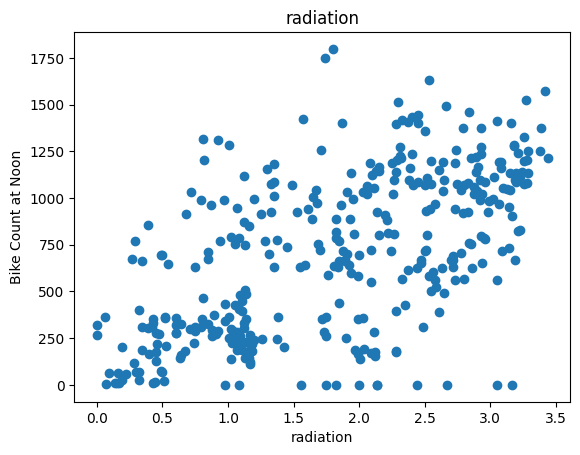

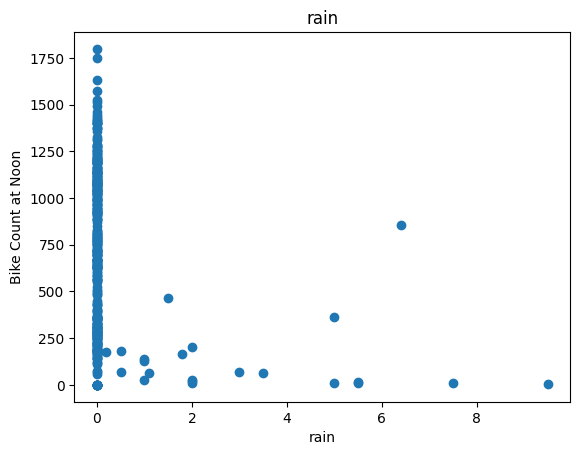

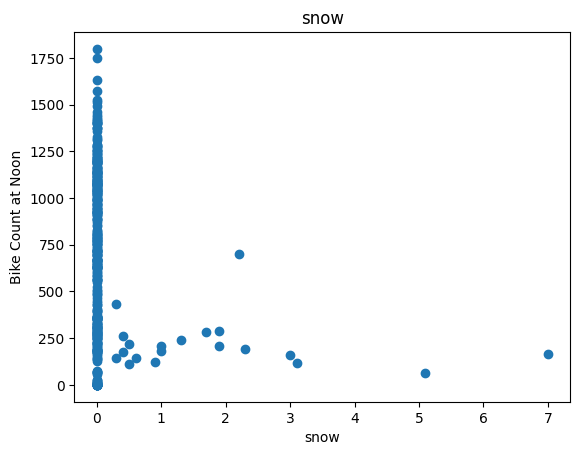

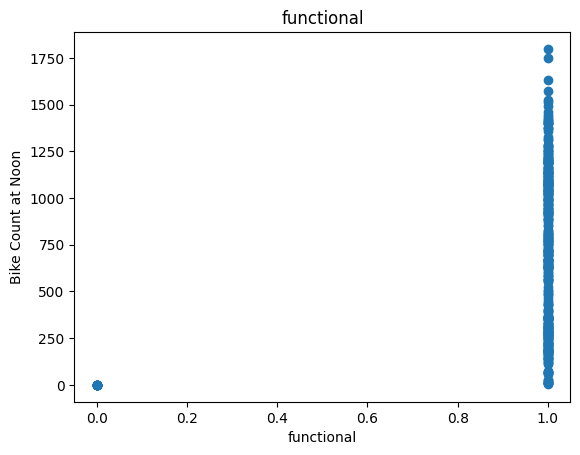

In [11]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [12]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [13]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Split into Train/Valid/Test Datasets

In [14]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [15]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x, y))

    return data, x, y

In [16]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])


print(x_train_temp)

[[ 13.3]
 [  2.2]
 [ 16.5]
 [ 20.1]
 [ 16.5]
 [  3.9]
 [ 26.3]
 [ 19.6]
 [ 10.2]
 [ 23.9]
 [ 26.2]
 [ 30.1]
 [  1.1]
 [ 34.5]
 [ 15.7]
 [  9.3]
 [ 27. ]
 [ 22.5]
 [  9.1]
 [ 22.2]
 [ 36.6]
 [  5.5]
 [ -3.4]
 [  9.4]
 [  9. ]
 [ -7.8]
 [  8.5]
 [ 18.2]
 [  1.5]
 [ 11.9]
 [ -6.5]
 [ 11.5]
 [ 20.5]
 [ 28.1]
 [ 22.1]
 [ 25.3]
 [ 36.5]
 [ 29.8]
 [ 15.3]
 [ 10. ]
 [  2.5]
 [  2.7]
 [ 16.3]
 [ 24.2]
 [ 21.7]
 [ 23.4]
 [ 18. ]
 [ 28.3]
 [ 20.5]
 [ 24.8]
 [  6.9]
 [ 12.8]
 [  4. ]
 [ 19.6]
 [ -7.7]
 [  0.9]
 [ 24.1]
 [  7.6]
 [ 22.1]
 [ -8.6]
 [ 31.9]
 [ 20.8]
 [ 18. ]
 [ 19.8]
 [ 33.2]
 [ 13.9]
 [ 25.2]
 [ 15.2]
 [ 18.2]
 [  3.7]
 [-12.2]
 [ 16.5]
 [  4. ]
 [  3.9]
 [ 34.2]
 [  6.9]
 [ 18.2]
 [  0. ]
 [ 32.6]
 [  6.7]
 [ 30.1]
 [  1.7]
 [ 31.1]
 [ 24.9]
 [ 27.5]
 [ 15.7]
 [ -1.8]
 [ 22.4]
 [ 20. ]
 [ 18. ]
 [ 12.4]
 [ 33.4]
 [  4.8]
 [ 33.7]
 [ 25.9]
 [ 20.8]
 [ 24.7]
 [ 13.2]
 [ 23.1]
 [ 10.4]
 [ -3.7]
 [ -9.6]
 [ 10.6]
 [-11.3]
 [ 10.1]
 [ 24.3]
 [ 20.5]
 [ 28.2]
 [ 24.8]
 [  2.4]
 [ 32.5]
 

In [109]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [110]:
temp_reg.score(x_test_temp, y_test_temp)

0.26876355427130416

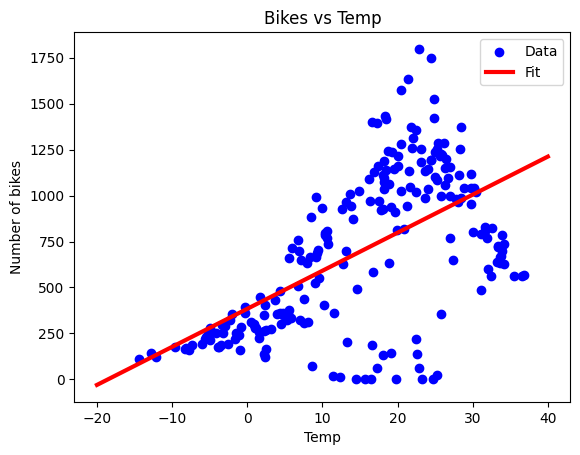

In [32]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [33]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [34]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [36]:
all_reg.score(x_test_all, y_test_all)

0.6059103063194338

In [44]:
y_pred_lr = all_reg.predict(x_test_all)

# Regression with Neural Net

In [45]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [46]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [47]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [48]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [51]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp, y_val_temp)
)

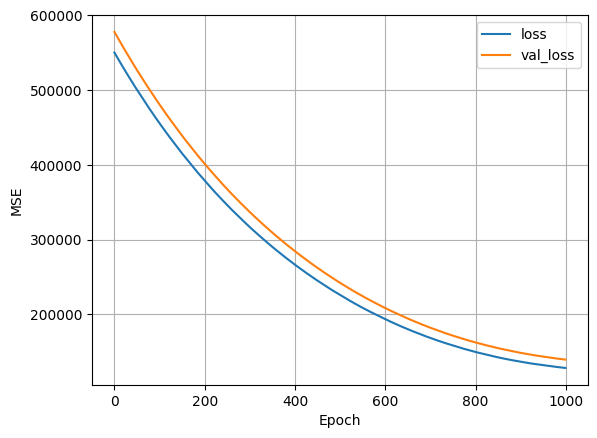

In [52]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


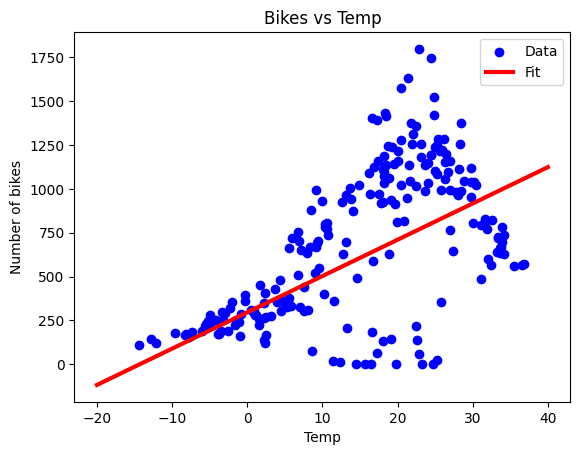

In [54]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [83]:
normalizer = tf.keras.layers.Normalization(input_shape=(6,1), axis=1)
normalizer.adapt(x_train_all)

In [84]:
nn_modelx = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])

In [85]:
nn_modelx.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [86]:
nn_history = nn_modelx.fit(
    x_train_all, y_train_all,
    verbose=0,
    epochs=200,
    validation_data=(x_val_all, y_val_all)
)

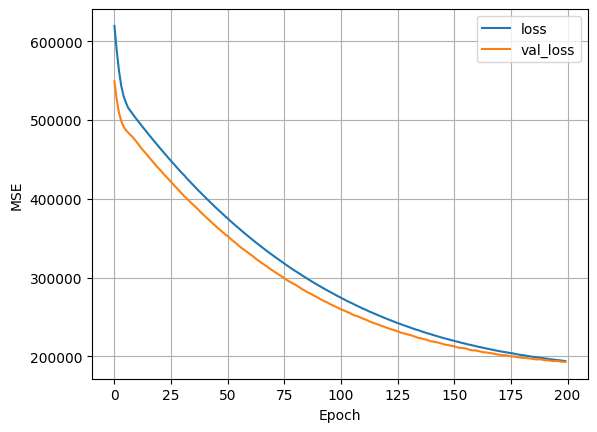

In [87]:
plot_loss(nn_history)

# Nueral Net

In [79]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [80]:
history = nn_model.fit(
    x_train_temp, y_train_temp,
    validation_data=(x_val_temp, y_val_temp),
    verbose=0, epochs=100
)

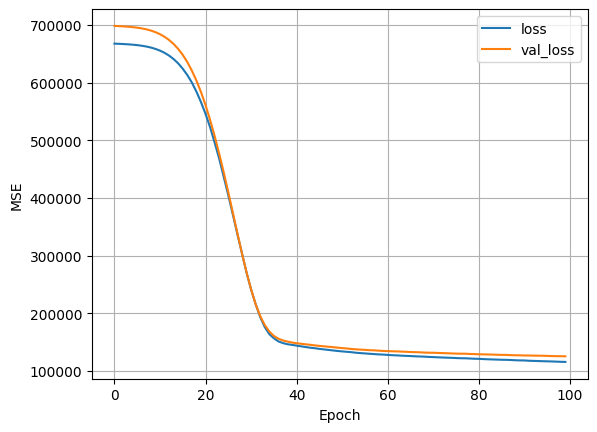

In [81]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


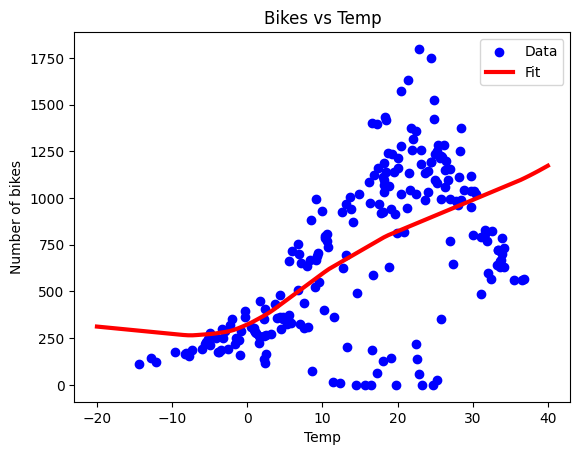

In [82]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [88]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(x_train_all)

In [89]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [91]:
history = nn_model.fit(
    x_train_all, y_train_all,
    validation_data=(x_val_all, y_val_all),
    verbose=0, epochs=100
)

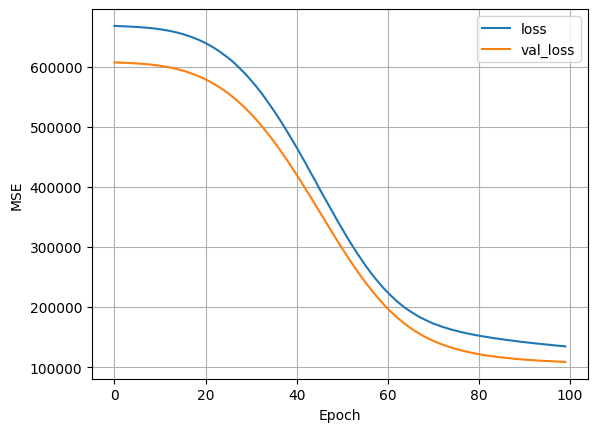

In [92]:
plot_loss(history)

In [93]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 [==============================] - 0s 3ms/step


In [94]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [95]:
MSE(y_pred_lr, y_test_all)

76422.77487223891

In [96]:
MSE(y_pred_nn, y_test_all)

107649.7823649999

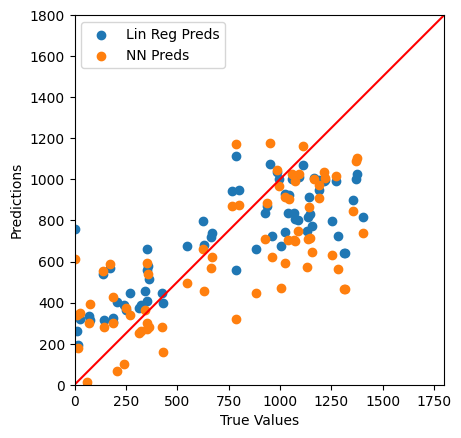

In [97]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")